In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


import sys

sys.path.append('../')

from eda import utils

tracks = utils.load('../data/fma_metadata/tracks.csv')
features = utils.load('../data/fma_metadata/features.csv')

In [2]:
small = tracks['set', 'subset'] <= 'small'
X = features.loc[small]
y = tracks['track', 'genre_top'].loc[small]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


               precision    recall  f1-score   support

   Electronic       0.53      0.56      0.54       204
 Experimental       0.60      0.39      0.47       196
         Folk       0.57      0.66      0.61       200
      Hip-Hop       0.60      0.68      0.64       209
 Instrumental       0.55      0.59      0.57       198
International       0.68      0.58      0.63       206
          Pop       0.41      0.39      0.40       189
         Rock       0.64      0.71      0.67       198

     accuracy                           0.57      1600
    macro avg       0.57      0.57      0.57      1600
 weighted avg       0.57      0.57      0.57      1600



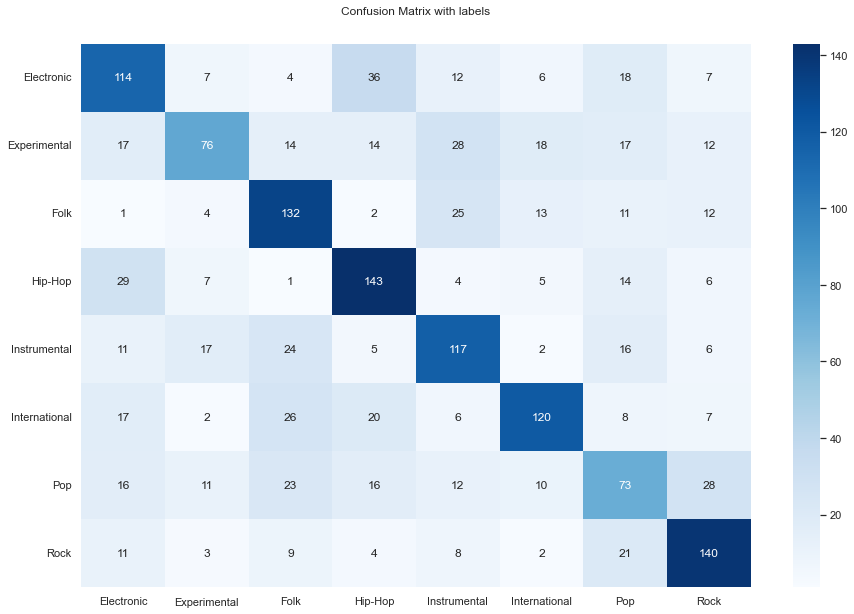

In [4]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X=X_train, y=y_train)
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))
cf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(rfc.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(rfc.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()